In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [24]:
datasets = ['train', 'val', 'test']
loaded_data = {}
for dataset in datasets:
    loaded_data[f'{dataset}_X'] = pd.read_csv(f'E:/Coding/Applied Machine Learning/01-email-spam-classification/data/{dataset}_X.csv')
    loaded_data[f'{dataset}_y'] = pd.read_csv(f'E:/Coding/Applied Machine Learning/01-email-spam-classification/data/{dataset}_y.csv')

# Access the loaded datasets like this:
train_X = loaded_data['train_X']
train_y = loaded_data['train_y']
val_X = loaded_data['val_X']
val_y = loaded_data['val_y']
test_X = loaded_data['test_X']
test_y = loaded_data['test_y']

In [25]:
from xgboost import XGBClassifier

In [26]:
from tqdm import tqdm
import time

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [63]:
from sklearn.metrics import accuracy_score

In [62]:
def train_models(train_X, train_y):
    # XGBoost model
    xgb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', XGBClassifier(random_state=1))
    ])
    xgb_pipeline.fit(train_X, train_y)

    # Logistic Regression model
    lr_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', LogisticRegression(random_state=1))
    ])
    lr_pipeline.fit(train_X, train_y)

    # Multinomial Naive Bayes model
    nb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', MultinomialNB())
    ])
    nb_pipeline.fit(train_X, train_y)

    return xgb_pipeline, lr_pipeline, nb_pipeline

In [64]:
def evaluate_models(pipelines, val_X, val_y):
    results = {}
    for name, pipeline in pipelines.items():
        predictions = pipeline.predict(val_X)
        accuracy = accuracy_score(val_y, predictions)
        results[name] = accuracy
        print(f'{name} Accuracy: {accuracy:.4f}')
    return results

In [65]:
xgb_pipeline, lr_pipeline, nb_pipeline = train_models(train_X.text, train_y.spam)

In [66]:
# Store the pipelines in a dictionary for easy reference
pipelines = {
    'XGBoost': xgb_pipeline,
    'Logistic Regression': lr_pipeline,
    'Multinomial Naive Bayes': nb_pipeline
}

# Evaluate models on validation data
evaluation_results = evaluate_models(pipelines, val_X.text, val_y.spam)

XGBoost Accuracy: 0.9804
Logistic Regression Accuracy: 0.9749
Multinomial Naive Bayes Accuracy: 0.9637


In [40]:
# Train an XGBoost model with TF-IDF vectorization
def train_xgboost(train_X, train_y):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', XGBClassifier(random_state=1))
    ])
    pipeline.fit(train_X, train_y)
    return pipeline

In [28]:
len(train_X), len(train_y)

(4296, 4296)

In [54]:
best_model = train_xgboost(train_X.text, train_y.spam)

In [59]:
# Evaluate the model and display results
def evaluate_model(model, test_X, test_y):

    # Evaluate the best model on the test data
    best_model = model
    test_accuracy = best_model.score(test_X, test_y)
    print("Test Accuracy with Best Model: ", test_accuracy)

    y_pred = model.predict(test_X)
    confusion = confusion_matrix(test_y, y_pred)
    report = classification_report(test_y, y_pred, target_names=["Class 0", "Class 1"])

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(report)

Test Accuracy with Best Model:  0.9947643979057592


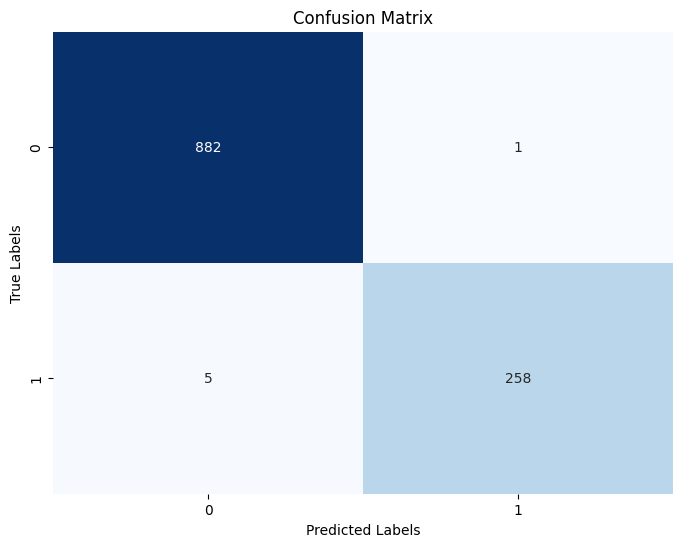

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       883
     Class 1       1.00      0.98      0.99       263

    accuracy                           0.99      1146
   macro avg       1.00      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [60]:
evaluate_model(best_model, test_X.text, test_y.spam)